In [1]:
#Importing Libraries
import numpy as np             
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_wine
from sklearn.preprocessing import PolynomialFeatures, StandardScaler   
from sklearn.linear_model import LinearRegression, HuberRegressor 
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [ ]:
#Loading dataset and some tidying
features, target = load_wine(return_X_y=True)
Features = pd.DataFrame(features)
Labels = np.reshape(target,(-1,1))
#Scaling Features for std=1, mean=0
Features = StandardScaler().fit_transform(Features)
Features = pd.DataFrame(Features)
#Finalizing the dataframe of our features and labels
final_data = np.concatenate([Features,Labels],axis=1)
dataset = pd.DataFrame(final_data)

(178,)

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0.0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0.0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0.0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2.0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2.0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2.0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2.0


In [4]:
pca = PCA(n_components=2)
pca_wine = pca.fit_transform(Features)

In [5]:
pca_df = pd.DataFrame(data = pca_wine
             )

In [6]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

<AxesSubplot:xlabel='0', ylabel='1'>

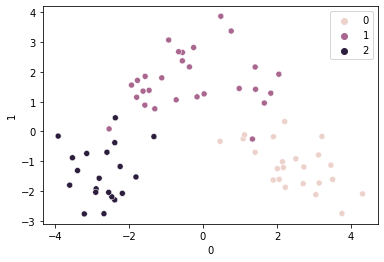

In [9]:
sns.scatterplot(x=X_train.loc[:, 0],y=X_train.loc[:, 1],hue=y_train.ravel())

In [8]:
X_train, X_rem, y_train, y_rem = train_test_split(pca_df,Labels,test_size =0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

In [10]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train.ravel())


y_pred_train = neigh.predict(X_train)

tr_error = accuracy_score(y_train,y_pred_train)
    
y_pred_val = neigh.predict(X_val)
val_error =accuracy_score(y_val,y_pred_val)
tr_error, val_error


(0.9577464788732394, 0.9647058823529412)

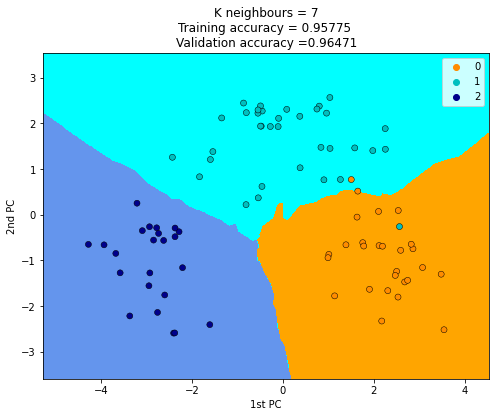

<Figure size 432x288 with 0 Axes>

In [11]:
h = 0.02 

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

x_min, x_max = X_val.loc[:,0].min() - 1, X_val.loc[:,0].max() + 1
y_min, y_max = X_val.loc[:,1].min() - 1, X_val.loc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
x=X_val.loc[:, 0],
y=X_val.loc[:, 1],
hue=y_val.ravel(),
palette=cmap_bold,
alpha=1.0,
edgecolor="black",)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title(f'K neighbours = 7\nTraining accuracy = {tr_error:.5} \nValidation accuracy ={val_error:.5}')

plt.show()
plt.savefig('classed.png')

In [12]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.ravel())

y_pred_train = neigh.predict(X_train)

tr_error = accuracy_score(y_train,y_pred_train)
    
y_pred_val = neigh.predict(X_val)
val_error =accuracy_score(y_val,y_pred_val)
tr_error, val_error

(0.9436619718309859, 0.9764705882352941)

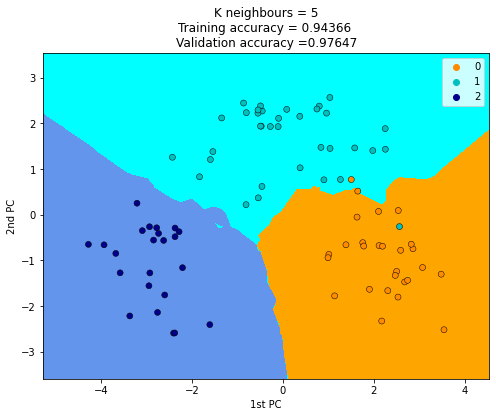

<Figure size 432x288 with 0 Axes>

In [13]:
h = 0.02 

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

x_min, x_max = X_val.loc[:,0].min() - 1, X_val.loc[:,0].max() + 1
y_min, y_max = X_val.loc[:,1].min() - 1, X_val.loc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
x=X_val.loc[:, 0],
y=X_val.loc[:, 1],
hue=y_val.ravel(),
palette=cmap_bold,
alpha=1.0,
edgecolor="black",)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("5-Class classification")
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title(f'K neighbours = 5\nTraining accuracy = {tr_error:.5} \nValidation accuracy ={val_error:.5}')


plt.show()
plt.savefig('classed.png')

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.ravel())

y_pred_train = neigh.predict(X_train)

tr_error = accuracy_score(y_train,y_pred_train)
    
y_pred_val = neigh.predict(X_val)
val_error =accuracy_score(y_val,y_pred_val)
tr_error, val_error

(0.971830985915493, 0.9764705882352941)

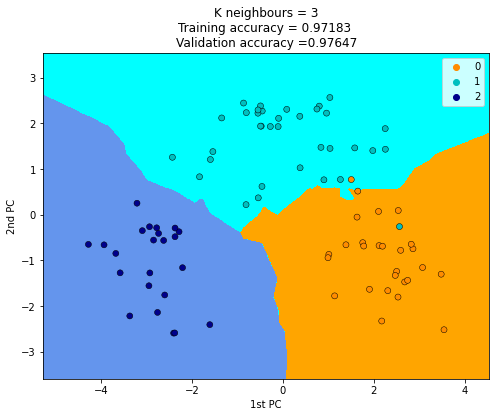

<Figure size 432x288 with 0 Axes>

In [15]:
h = 0.02 

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

x_min, x_max = X_val.loc[:,0].min() - 1, X_val.loc[:,0].max() + 1
y_min, y_max = X_val.loc[:,1].min() - 1, X_val.loc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
x=X_val.loc[:, 0],
y=X_val.loc[:, 1],
hue=y_val.ravel(),
palette=cmap_bold,
alpha=1.0,
edgecolor="black",)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("5-Class classification")
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title(f'K neighbours = 3\nTraining accuracy = {tr_error:.5} \nValidation accuracy ={val_error:.5}')


plt.show()
plt.savefig('classed.png')

In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.ravel())

y_pred_test = neigh.predict(X_test)
test_error =accuracy_score(y_test,y_pred_test)
test_error

0.9545454545454546

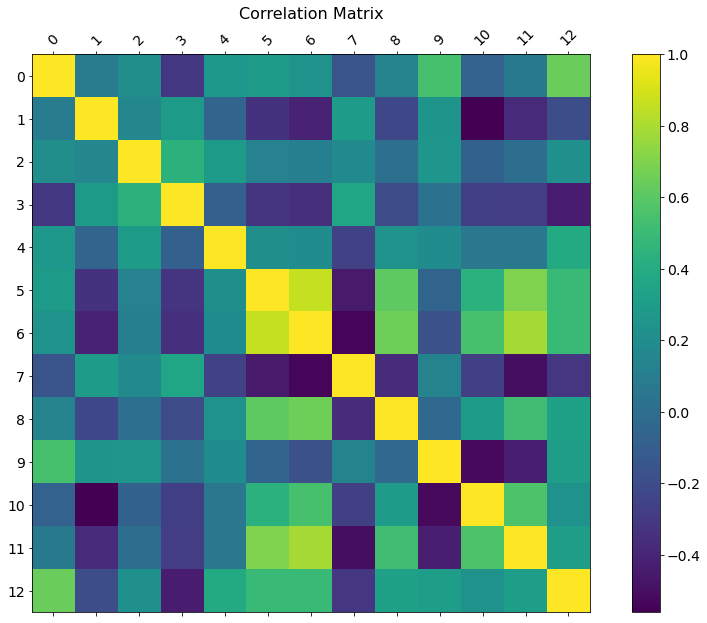

In [17]:
f = plt.figure(figsize=(15, 10))
plt.matshow(Features.corr(),fignum=f.number)
plt.xticks(range(Features.select_dtypes(['number']).shape[1]), Features.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(Features.select_dtypes(['number']).shape[1]), Features.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()